<a href="https://colab.research.google.com/github/rajeshmore1/Linear-Regression-Car-Dekho-Data-/blob/main/Rajesh_More_Self_Project_Copy_of_M3W1_Self_Project_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## <b> CarDekho.com is India's leading car search venture that helps users buy cars that are right for them. Its website and app carry rich automotive content such as expert reviews, detailed specs and prices, comparisons as well as videos and pictures of all car brands and models available in India. The company has tie-ups with many auto manufacturers, more than 4000 car dealers and numerous financial institutions to facilitate the purchase of vehicles.

## <b> CarDekho.com has launched many innovative features to ensure that users get an immersive experience of the car model before visiting a dealer showroom. These include a Feel The Car tool that gives 360-degree interior/exterior views with sounds of the car and explanations of features with videos; search and comparison by make, model, price, features; and live offers and promotions in all cities. The platform also has used car classifieds wherein users can upload their cars for sale, and find used cars for buying from individuals and used car dealers.

## <b> Besides the above consumer product features, CarDekho.com provides a rich array of tech-enabled tools to OE manufacturers and car dealers. These include apps for dealer sales executives to manage leads, cloud services for tracking sales performance, call tracker solution, digital marketing support, virtual online showroom and outsourced lead management operational process for taking consumers from enquiry to sale.

## <b> Our vision is to construct a complete ecosystem for consumers and car manufacturers, dealers and related businesses such that consumers have easy and complete access to not only buying and selling cars, but also manage their entire ownership experience, be it accessories, tyres, batteries, insurance or roadside assistance. </b>

## <b>In this project, the dataset contains information about used cars listed on www.cardekho.com. This data can be used for a lot of purposes such as price prediction to exemplify the use of linear regression in Machine Learning.</b>

## <b>The columns in the given dataset are as follows:</b>

- ### name
- ### year
- ### selling_price
- ### km_driven
- ### fuel
- ### seller_type
- ### transmission
- ### Owner

## <b>Load up this dataset in the kernel and perform initial exploratory data analysis (EDA). You should also try creating new features based on the existing ones. The dependent variable is the <code>selling_price</code>. 

## <b> Your task is to build a linear regression model on this dataset (always split into train and test). Evaluate the fitted model on test data using different regression metrics. Also use your linear regression model from <code>statsmodels.api</code> to run a similar regression and obtain parameter inferences for each of the model variables. Next, you need to try if regularizing your model helps you perform well on the test dataset. For this, use <code> Ridge</code> and <code>Lasso</code> regressions on the dataset and check for different values of the tuning parameter ($\lambda$ or $\alpha$ , do not confuse this $\alpha$ with the learning rate.) For each of the above regressions, get the feature importances using the regression coefficients.

## <b><u> Few things to keep in mind :</u>
* ### You should take care of categorical variables (variables which take discrete categories or classes) and do one-hot encoding to be able to pass them into the model.
* ### Try to include as many plots and charts you can. This adds for a great visual interpretation of your tasks/activities.
* ### Write detailed explanation of your approaches in the notebook and once you have some results, try to provide explanations for these observed results. Remember our objective is not only to build a machine learning model but to be able to explain why, what and how of the entire modeling process.

In [ ]:
# Importing the libraries
import numpy as np
import pandas as pd
from numpy import math

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Cohort Aravali/Module 3/Week 1/Day 6/Car dekho/Copy of CAR DETAILS FROM CAR DEKHO.csv')

# **Primary Inspection**

1. There are 8 columns and 4340 row entries in our dataset.
2. No column is having null values. Columns are having 'object' and 'integer' as datatypes.
3. Dependent Variable is Selling Price
4. Independent variables are - name, year,km driven, fuel seller type, transmission, owner.
5. Listed cars are having fuel type as - Petrol, Diesel, LPG,CNG and electric.
6. Mostly the sellers are of indivial followed by Dealer and trustmark dealer.
7. Listed cars having two types of Transmission system- Manual and Automatic.
8. Fisr owner cars having maximum listings followed by second owner, third owner, fourth and above owner and Test drive cars.

In [ ]:
# First look
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


In [ ]:
#No null values
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [ ]:
dataset['name'].value_counts()

Maruti Swift Dzire VDI               69
Maruti Alto 800 LXI                  59
Maruti Alto LXi                      47
Maruti Alto LX                       35
Hyundai EON Era Plus                 35
                                     ..
Tata Indica Vista Terra TDI BSIII     1
Honda City 1.5 V AT Exclusive         1
Volkswagen Passat 1.8 TSI MT          1
Force One EX                          1
Renault Duster 85PS Diesel RxZ        1
Name: name, Length: 1491, dtype: int64

In [ ]:
dataset['year'].value_counts()

2017    466
2015    421
2012    415
2013    386
2014    367
2018    366
2016    357
2011    271
2010    234
2019    195
2009    193
2008    145
2007    134
2006    110
2005     85
2020     48
2004     42
2003     23
2002     21
2001     20
1998     12
2000     12
1999     10
1997      3
1996      2
1995      1
1992      1
Name: year, dtype: int64

In [ ]:
dataset['selling_price'].value_counts()

300000     162
250000     125
350000     122
550000     107
600000     103
          ... 
1331000      1
479000       1
1290000      1
746000       1
213000       1
Name: selling_price, Length: 445, dtype: int64

In [ ]:
dataset['fuel'].value_counts()

Diesel      2153
Petrol      2123
CNG           40
LPG           23
Electric       1
Name: fuel, dtype: int64

In [ ]:
dataset['seller_type'].value_counts()

Individual          3244
Dealer               994
Trustmark Dealer     102
Name: seller_type, dtype: int64

In [ ]:
dataset['transmission'].value_counts()

Manual       3892
Automatic     448
Name: transmission, dtype: int64

In [ ]:
dataset['owner'].value_counts()

First Owner             2832
Second Owner            1106
Third Owner              304
Fourth & Above Owner      81
Test Drive Car            17
Name: owner, dtype: int64

In [ ]:
dataset.describe(include='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [ ]:
# Checking duplicate entries in dataset
len(dataset[dataset.duplicated()])

763

In [ ]:
# Dropped Duplicate entries in Dataset
dataset.drop_duplicates(keep=False,inplace=True)
len(dataset[dataset.duplicated()])

0

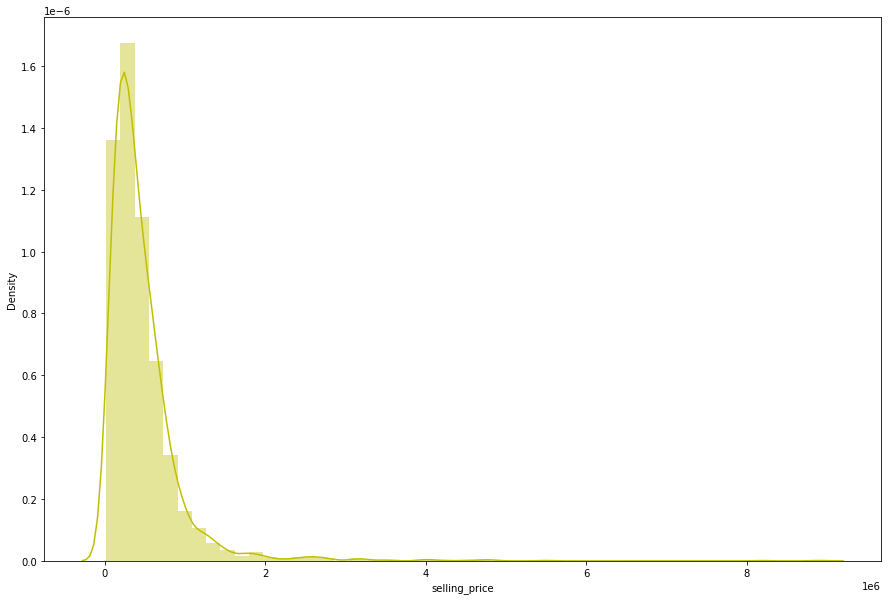

In [ ]:
#visualising each feature
#Selling price=dependent variable. It is positively skwed before removing outliers.
plt.figure(figsize=(15,10))
sns.distplot(dataset['selling_price'],color="y")

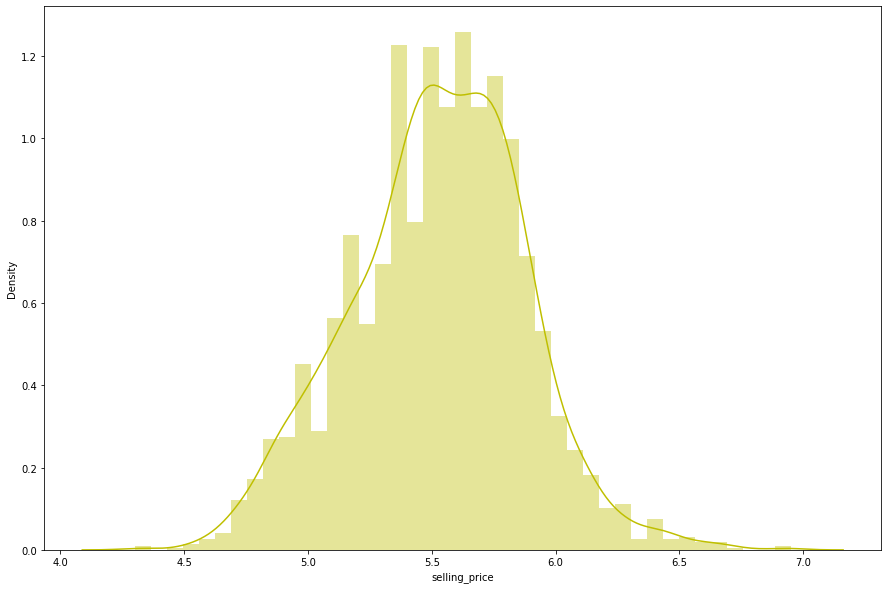

In [ ]:
#transformation
plt.figure(figsize=(15,10))
sns.distplot(np.log10(dataset['selling_price']),color="y")

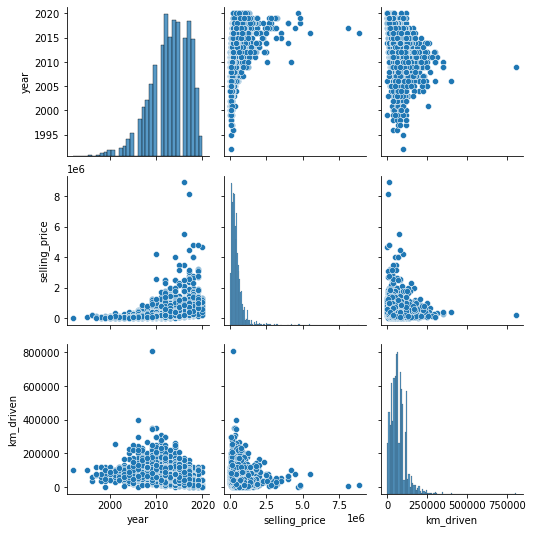

In [ ]:
sns.pairplot(dataset)


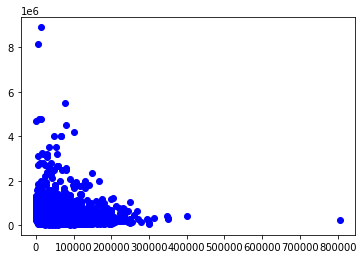

In [ ]:
selling_price=dataset['selling_price']
km_driven=dataset['km_driven']
plt.scatter(km_driven,selling_price, c ="blue") 
  
# To show the plot 
plt.show()

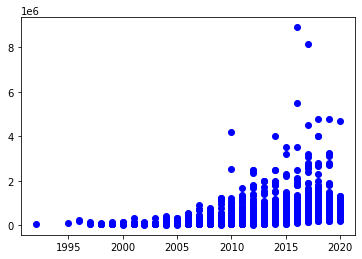

In [ ]:
selling_price=dataset['selling_price']
year=dataset['year']
plt.scatter(year,selling_price, c ="blue") 
  
# To show the plot 
plt.show()

In [ ]:
numeric_features = dataset.describe().columns

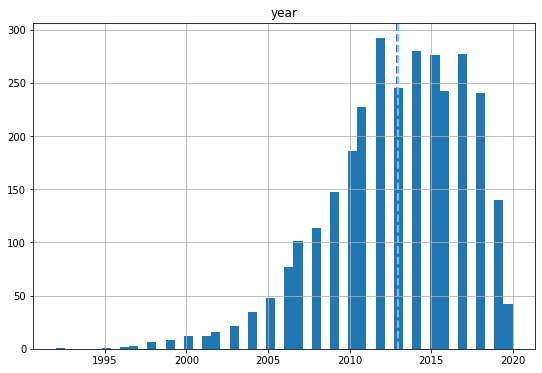

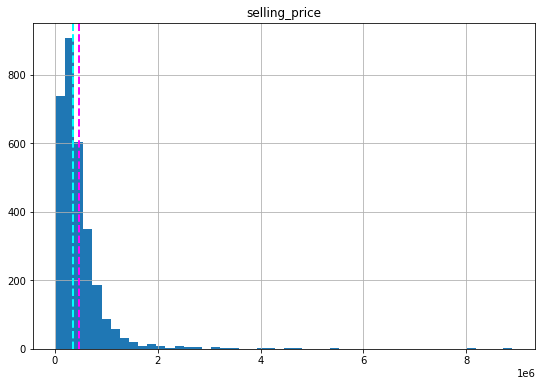

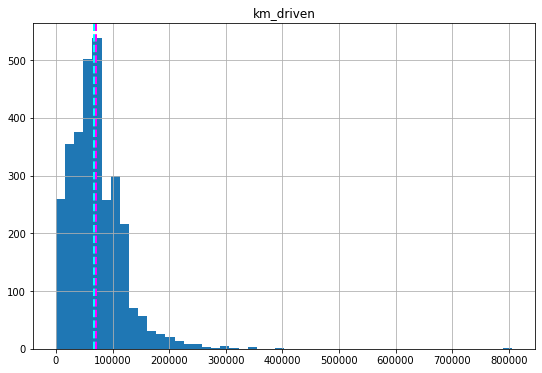

In [ ]:

# plot a bar plot for each categorical feature count

for col in numeric_features[0:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

#Transformation
square-root for moderate skew: sqrt(x) for positively skewed data, sqrt(max(x+1) - x) for negatively skewed data

log for greater skew: log10(x) for positively skewed data, log10(max(x+1) - x) for negatively skewed data

inverse for severe skew: 1/x for positively skewed data 1/(max(x+1) - x) for negatively skewed data

Linearity and heteroscedasticity: First try log transformation in a situation where the dependent variable starts to increase more rapidly with increasing independent variable values If your data does the opposite – dependent variable values decrease more rapidly with increasing independent variable values – you can first consider a square transformation.

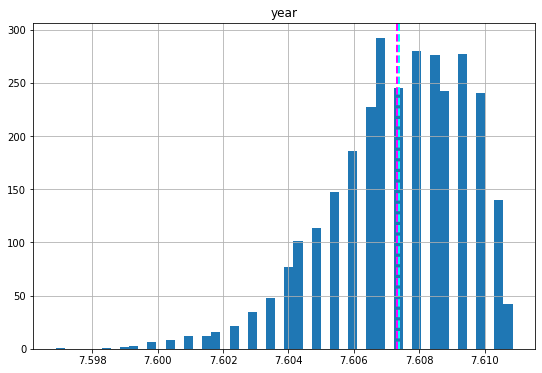

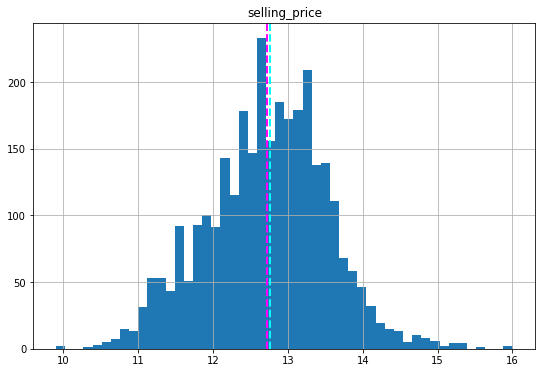

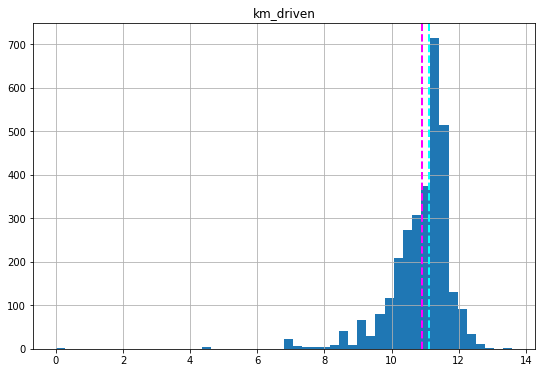

In [ ]:
#@title Default title text
# plot a bar plot for each categorical feature count.

for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = np.log(dataset[col])
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='magenta', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='cyan', linestyle='dashed', linewidth=2)    
    ax.set_title(col)
plt.show()

In [ ]:
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    for i, point in a.iterrows():
        ax.text(point['x'], point['y'], str(point['val']))

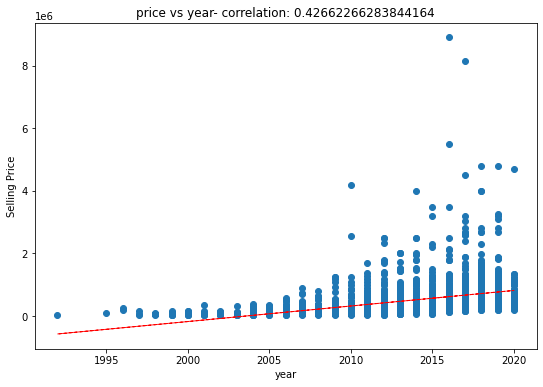

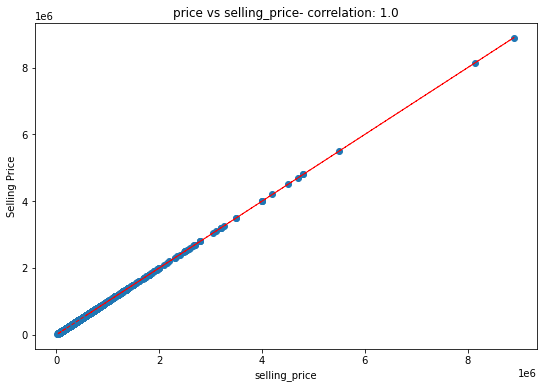

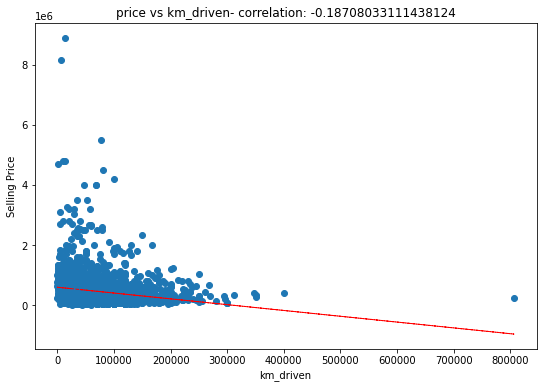

In [ ]:
for col in numeric_features[:]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = dataset[col]
    label = dataset['selling_price']
    correlation = feature.corr(label)
    plt.scatter(x=feature, y=label)
    plt.xlabel(col)
    plt.ylabel('Selling Price')
    ax.set_title('price vs ' + col + '- correlation: ' + str(correlation))
    z = np.polyfit(dataset[col], dataset['selling_price'], 1)
    y_hat = np.poly1d(z)(dataset[col])

    plt.plot(dataset[col], y_hat, "r--", lw=1)

plt.show()

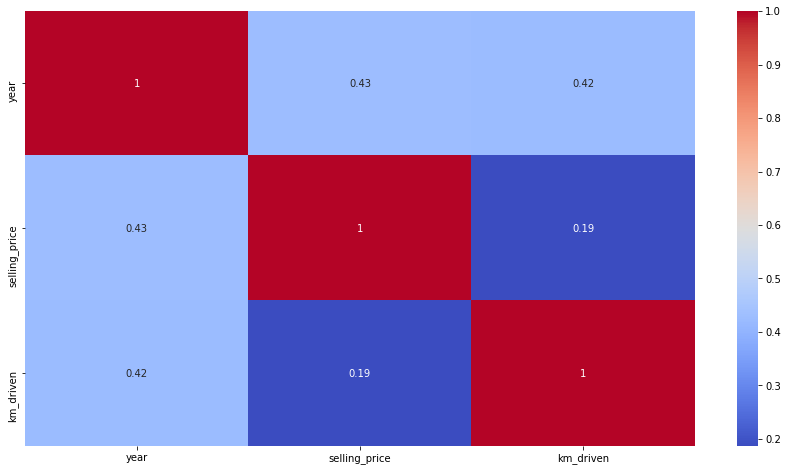

In [ ]:
## Correlation
plt.figure(figsize=(15,8))
correlation = dataset.corr()
sns.heatmap(abs(correlation), annot=True, cmap='coolwarm')

In [ ]:
#Multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(dataset[[i for i in dataset.describe().columns if i not in ['year','selling_price','km_driven']]])

,variables,VIF


In [ ]:
dataset['name'].unique()

array(['Maruti Ciaz VXi Plus', 'Hyundai Venue SX Opt Diesel',
       'Chevrolet Enjoy TCDi LTZ 7 Seater', ...,
       'Tata Manza Aura Safire BS IV',
       'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV',
       'Hyundai i20 Magna 1.4 CRDi'], dtype=object)

In [ ]:
dataset['company'] = dataset['name'].str.split(" ", expand=True)[0]
dataset['company'] = dataset['company'].replace({'toyouta': 'Toyota','vw':'Volkswagen','vokswagen':'Volkswagen',
                                                      'maxda':'Mazda','porcshce':'Porsche'})
dataset['company'] = dataset['company'].str.title()
dataset['company'].value_counts()

Maruti           931
Hyundai          521
Mahindra         294
Tata             260
Ford             204
Honda            186
Toyota           145
Chevrolet        126
Renault           88
Volkswagen        80
Skoda             40
Nissan            40
Fiat              27
Datsun            22
Audi              21
Bmw               20
Mercedes-Benz     16
Land               5
Volvo              4
Mitsubishi         4
Jaguar             4
Jeep               3
Ambassador         2
Mg                 2
Opelcorsa          2
Kia                1
Isuzu              1
Daewoo             1
Force              1
Name: company, dtype: int64

In [ ]:
numerical_features = ['year','selling_price','km_driven']

In [ ]:
categorical_features = dataset.describe(include=['object','category']).columns
categorical_features

Index(['name', 'fuel', 'seller_type', 'transmission', 'owner', 'company'], dtype='object')

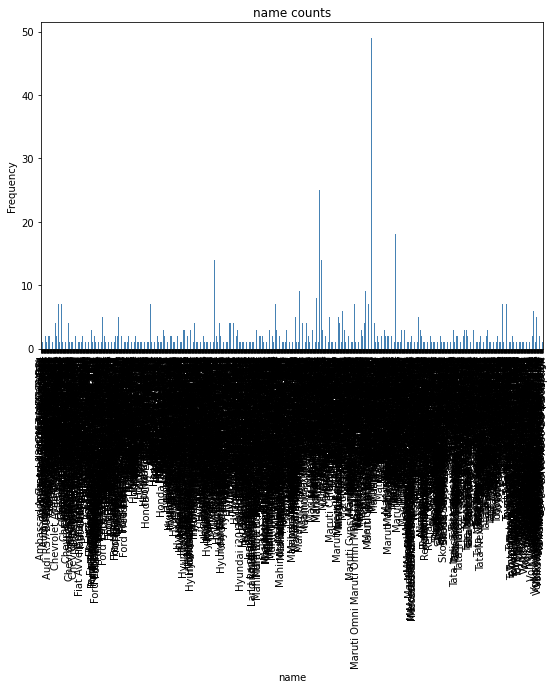

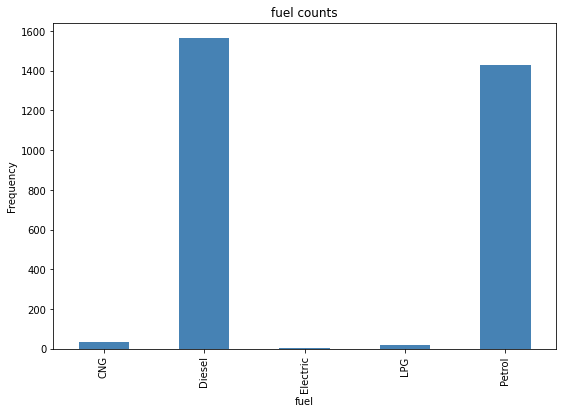

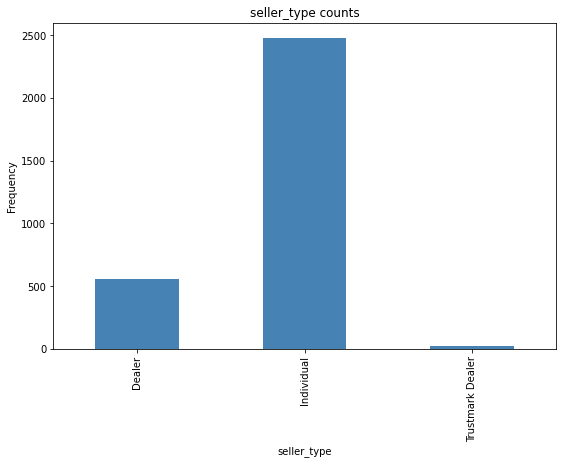

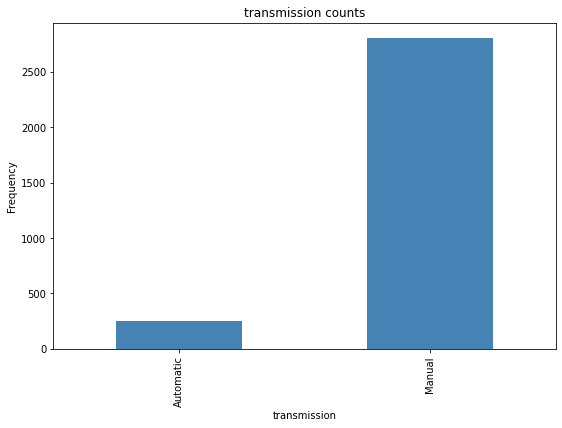

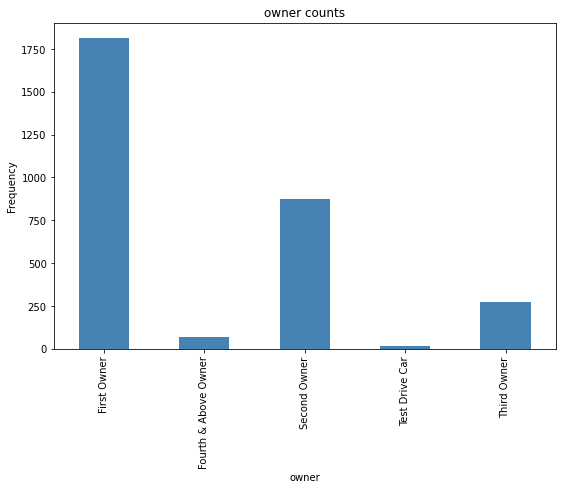

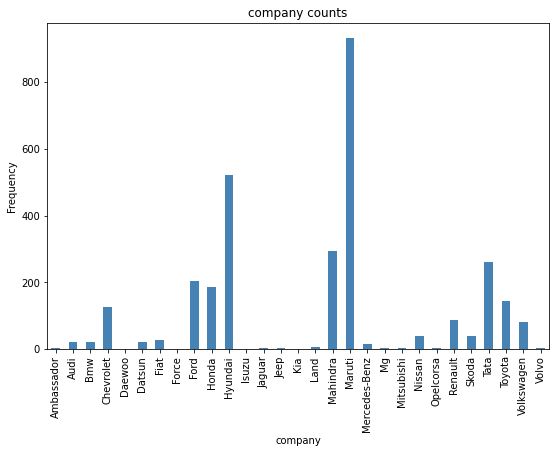

In [ ]:
# plot a bar plot for each categorical feature count  

for col in categorical_features:
    counts = dataset[col].value_counts().sort_index()
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    counts.plot.bar(ax = ax, color='steelblue')
    ax.set_title(col + ' counts')
    ax.set_xlabel(col) 
    ax.set_ylabel("Frequency")
plt.show()

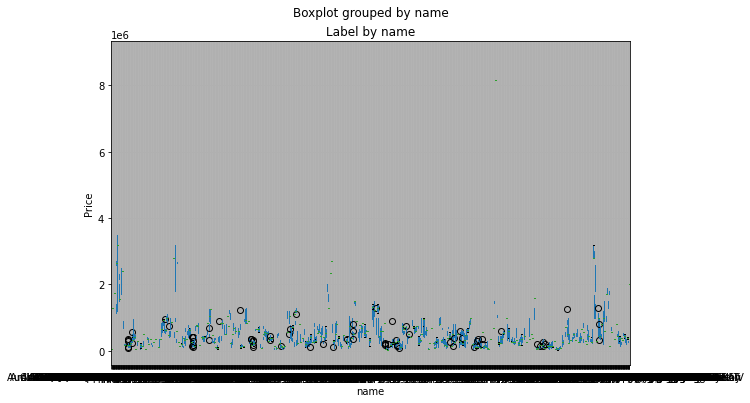

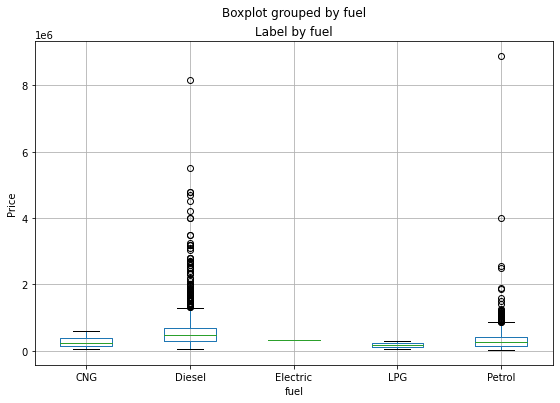

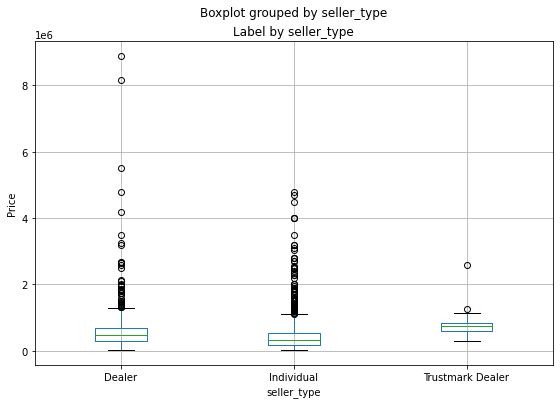

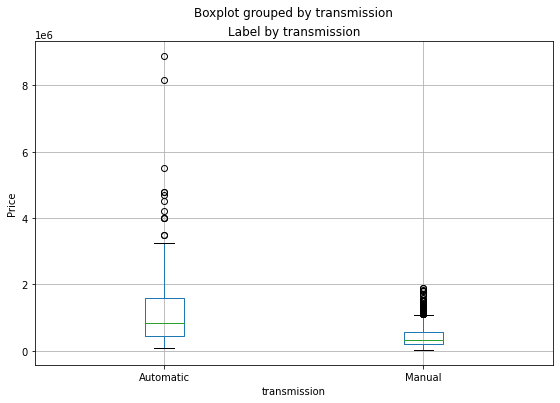

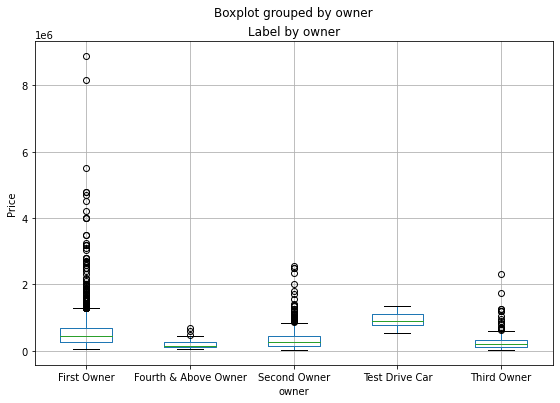

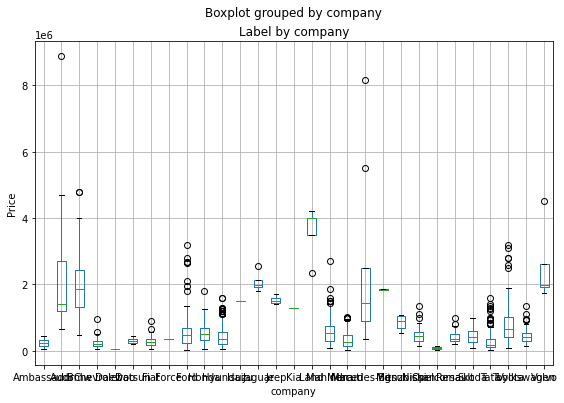

In [ ]:
# plot a boxplot for the label by each categorical feature  

for col in categorical_features:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    dataset.boxplot(column = 'selling_price', by = col, ax = ax)
    ax.set_title('Label by ' + col)
    ax.set_ylabel("Price")
plt.show()

<Figure size 1440x432 with 0 Axes>

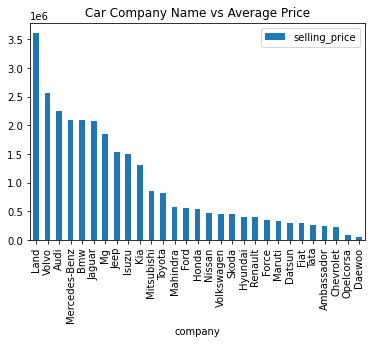

In [ ]:
plt.figure(figsize=(20, 6))

df_autox = pd.DataFrame(dataset.groupby(['company'])['selling_price'].mean().sort_values(ascending = False))
df_autox.plot.bar()
plt.title('Car Company Name vs Average Price')
plt.show()

In [ ]:
#df_autox.rename(columns={'selling_price':'price_mean'},inplace=True)

In [ ]:
#dataset = dataset.merge(df_autox,on = 'company',how = 'left')

In [ ]:
#dataset['company_cat'] = dataset['price_mean'].apply(lambda x : 0 if x < 12000 else (1 if 12000 <= x < 24000 else 2))

In [ ]:
dataset.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
26,Maruti Ciaz VXi Plus,2015,585000,24000,Petrol,Dealer,Manual,First Owner,Maruti
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,Diesel,Dealer,Manual,First Owner,Hyundai
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,Diesel,Individual,Manual,Second Owner,Chevrolet
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,Diesel,Dealer,Automatic,First Owner,Jaguar
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,Diesel,Dealer,Automatic,First Owner,Mercedes-Benz


In [ ]:
correlation.selling_price

year             0.426623
selling_price    1.000000
km_driven       -0.187080
Name: selling_price, dtype: float64

# <b> Data Preparation

In [ ]:
dataset.shape

(3051, 9)

In [ ]:
dataset_pr = dataset.copy()

In [ ]:
dataset_pr.shape

(3051, 9)

In [ ]:
### Data encoding
#label encoding
encoders_nums = {"fuel":{"Diesel":0,"Petrol":1,"CNG":2,"LPG":3,"Electric":4},
                 "seller_type":{"Individual":0,"Dealer":1,"Trustmark Dealer":2},
                 "transmission":{"Manual": 0, "Automatic": 1},
                 "owner":{"First Owner":1,"Second Owner":2,"Third Owner":3,"Fourth & Above Owner":4,"Test Drive Car":5}
                 }

dataset_pr = dataset_pr.replace(encoders_nums)

In [ ]:
dataset_pr.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
26,Maruti Ciaz VXi Plus,2015,585000,24000,1,1,0,1,Maruti
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,0,1,0,1,Hyundai
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,0,0,0,2,Chevrolet
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,0,1,1,1,Jaguar
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,0,1,1,1,Mercedes-Benz


In [ ]:
dataset_pr.shape

(3051, 9)

In [ ]:
dataset_pr.dropna(how='all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,company
26,Maruti Ciaz VXi Plus,2015,585000,24000,1,1,0,1,Maruti
27,Hyundai Venue SX Opt Diesel,2019,1195000,5000,0,1,0,1,Hyundai
28,Chevrolet Enjoy TCDi LTZ 7 Seater,2013,390000,33000,0,0,0,2,Chevrolet
29,Jaguar XF 2.2 Litre Luxury,2014,1964999,28000,0,1,1,1,Jaguar
30,Mercedes-Benz New C-Class 220 CDI AT,2013,1425000,59000,0,1,1,1,Mercedes-Benz
...,...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,0,0,0,2,Hyundai
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,0,0,0,2,Hyundai
4337,Maruti 800 AC BSIII,2009,110000,83000,1,0,0,2,Maruti
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,0,0,0,1,Hyundai


In [ ]:
features = numerical_features.copy()
features.extend(['year','selling_price','km_driven','fuel','seller_type','transmission','owner'])

In [ ]:
from scipy.stats import zscore
#Train test split
# numeric_cols = carprice.select_dtypes(include=[np.number]).columns
X = dataset_pr[features].apply(zscore)

In [ ]:
y = (dataset_pr['selling_price'])

In [ ]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( X,y , test_size = 0.2, random_state = 0) 
print(X_train.shape)
print(X_test.shape)

(2440, 10)
(611, 10)


# Implementing Linear Regression

In [ ]:
np.isnan(X_train).any(), np.isnan(y_train).any(), np.isnan(X_test).any(),np.isnan(y_test)

(True, True, True,True)

(True, True, True, True)

In [ ]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)


In [ ]:
reg.score(X_train, y_train)

1.0

In [ ]:
reg.coef_

array([ 7.21511065e+04,  1.10537979e+05,  4.66463429e+03, -7.21511065e+04,
        3.84800130e+05, -4.66463429e+03,  1.12777343e-10, -1.20053301e-10,
       -1.25510269e-10, -6.54836185e-11])

In [ ]:
y_pred = reg.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

MSE  = mean_squared_error((y_test),(y_pred))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

MSE : 1.5819691938294145e-19
RMSE : 3.9773976339177033e-10


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score((y_test), (y_pred))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 1.0
Adjusted R2 :  1.0


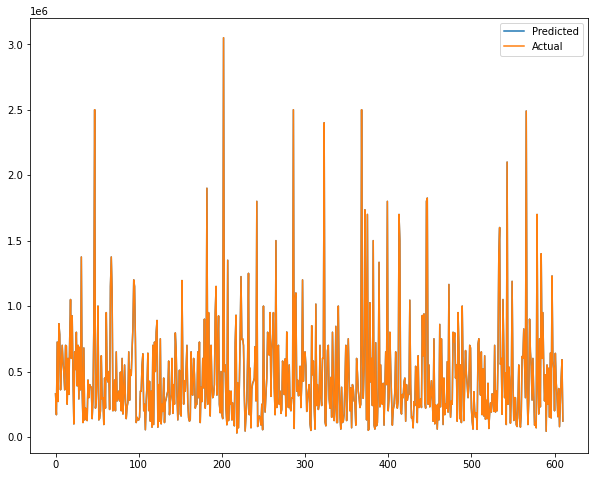

In [ ]:
plt.figure(figsize=(10,8))
plt.plot((y_pred))
plt.plot(np.array((y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# Implementing Lasso regression

In [ ]:
from sklearn.linear_model import Lasso
lasso  = Lasso(alpha=0.1 , max_iter= 3000)

lasso.fit(X_train, y_train)

Lasso(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=3000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
lasso.score(X_train, y_train)

0.9999999996444792

In [ ]:
y_pred_l = lasso.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_l))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_l))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_l)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 53.84734673088952
RMSE : 7.338075137996988
R2 : 0.999999999662855
Adjusted R2 :  0.999999999657236


#Understanding Cross Validation

Machine learning is an iterative process.You will face choices about predictive variables to use, what types of models to use,what arguments to supply those models, etc. We make these choices in a data-driven way by measuring model quality of various alternatives. You've already learned to use train_test_split to split the data, so you can measure model quality on the test data. Cross-validation extends this approach to model scoring (or "model validation.") Compared to train_test_split, cross-validation gives you a more reliable measure of your model's quality, though it takes longer to run.

#The Shortcoming of Train-Test Split

Imagine you have a dataset with 5000 rows. The train_test_split function has an argument for test_size that you can use to decide how many rows go to the training set and how many go to the test set. The larger the test set, the more reliable your measures of model quality will be. At an extreme, you could imagine having only 1 row of data in the test set. If you compare alternative models, which one makes the best predictions on a single data point will be mostly a matter of luck.
You will typically keep about 20% as a test dataset. But even with 1000 rows in the test set, there's some random chance in determining model scores. A model might do well on one set of 1000 rows, even if it would be inaccurate on a different 1000 rows. The larger the test set, the less randomness (aka "noise") there is in our measure of model quality.
But we can only get a large test set by removing data from our training data, and smaller training datasets mean worse models. In fact, the ideal modeling decisions on a small dataset typically aren't the best modeling decisions on large datasets.

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
### Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=3)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 5}

Using  {'alpha': 5}  the negative mean squared error is:  -66.12653847624146


In [ ]:
y_pred_lasso = lasso_regressor.predict(X_test)

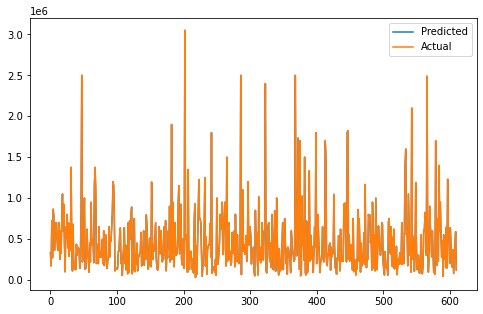

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_lasso))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_lasso))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_lasso))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 31.32762252564213
RMSE : 5.597108407529921
R2 : 0.9999999998038539
Adjusted R2 :  0.9999999998005848


# <b> Implementing Ridge Regression

In [ ]:
from sklearn.linear_model import Ridge

ridge  = Ridge(alpha=0.1)

In [ ]:
ridge.fit(X_train,y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [ ]:
ridge.score(X_train, y_train)

0.999999999392558

In [ ]:
y_pred_r = ridge.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_r))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_r))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test), (y_pred_r)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 94.11367013072099
RMSE : 9.701220033105166
R2 : 0.9999999994107426
Adjusted R2 :  0.9999999994009217


# <b> Running Grid Search Cross Validation for Ridge Regression </b>

In [ ]:
# Hyperprarameter tuning
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-15}

Using  {'alpha': 1e-15}  the negative mean squared error is:  -3.0782173283032375e-19


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_ridge))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_ridge))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 1.2639921936465686e-19
RMSE : 3.5552667883670396e-10
R2 : 1.0
Adjusted R2 :  1.0


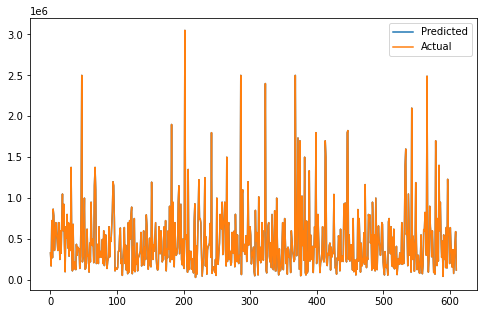

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_ridge))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

# <b> Implementing Elastic net Regression

In [ ]:
from sklearn.linear_model import ElasticNet
#a * L1 + b * L2
#alpha = a + b and l1_ratio = a / (a + b)
elasticnet = ElasticNet(alpha=0.1, l1_ratio=0.5)

In [ ]:
elasticnet.fit(X_train,y_train)

ElasticNet(alpha=0.1, copy_X=True, fit_intercept=True, l1_ratio=0.5,
           max_iter=1000, normalize=False, positive=False, precompute=False,
           random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [ ]:
elasticnet.score(X_train, y_train)

0.9991998007353854

In [ ]:
y_pred_en = elasticnet.predict(X_test)

In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_en))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test),(y_pred_en))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_en)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 120860129.60817078
RMSE : 10993.6404165395
R2 : 0.9992432796454707
Adjusted R2 :  0.9992306676395618


# <b> Running Grid Search Cross Validation for ELastic Net Regression

In [ ]:
elastic = ElasticNet()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100],'l1_ratio':[0.3,0.4,0.5,0.6,0.7,0.8]}
elastic_regressor = GridSearchCV(elastic, parameters, scoring='neg_mean_squared_error',cv=5)
elastic_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=ElasticNet(alpha=1.0, copy_X=True, fit_intercept=True,
                                  l1_ratio=0.5, max_iter=1000, normalize=False,
                                  positive=False, precompute=False,
                                  random_state=None, selection='cyclic',
                                  tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100],
                         'l1_ratio': [0.3, 0.4, 0.5, 0.6, 0.7, 0.8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [ ]:
y_pred_elastic = elastic_regressor.predict(X_test)

In [ ]:
print("The best fit alpha value is found out to be :" ,elastic_regressor.best_params_)
print("\nUsing ",elastic_regressor.best_params_, " the negative mean squared error is: ", elastic_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 0.0001, 'l1_ratio': 0.7}

Using  {'alpha': 0.0001, 'l1_ratio': 0.7}  the negative mean squared error is:  -74.2228192095541


In [ ]:
MSE  = mean_squared_error((y_test),(y_pred_elastic))
print("MSE :" , MSE)

RMSE = np.sqrt(MSE)
print("RMSE :" ,RMSE)

r2 = r2_score((y_test), (y_pred_elastic))
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score((y_test),(y_pred_elastic)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

MSE : 49.81212077429037
RMSE : 7.057770240967778
R2 : 0.9999999996881201
Adjusted R2 :  0.9999999996829222


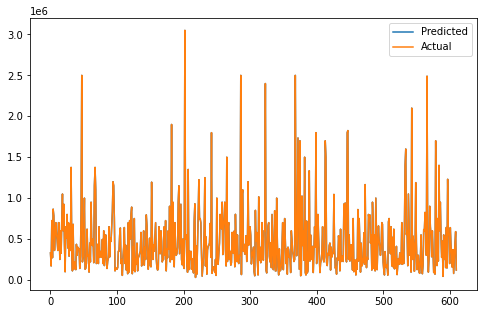

In [ ]:
plt.figure(figsize=(8,5))
plt.plot((y_pred_elastic))
plt.plot((np.array(y_test)))
plt.legend(["Predicted","Actual"])
plt.show()

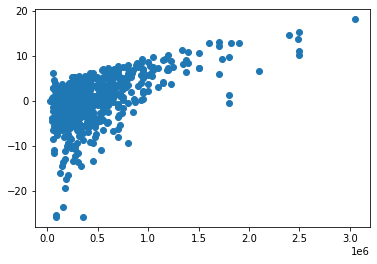

In [ ]:
### Heteroscadacity
plt.scatter((y_pred_lasso),(y_test)-(y_pred_lasso))

In [ ]:
(y_pred_lasso)

array([ 330005.9095279 ,  170004.25931619,  724994.72474503,
        271001.09769911,  865000.15918582,  781996.96641293,
        360000.30448119,  550006.52771313,  700003.7054644 ,
        564997.03577332,  489994.59797267,  360000.57444564,
        699994.68370638,  696006.2682562 ,  250013.33032318,
        599999.22604263,  324996.96501762,  749999.1996132 ,
       1049993.03130324,  599993.18227174,  924995.94175824,
        439996.48939856,   99001.48141696,  650000.2825645 ,
        514997.87080622,  799994.97507193,  390000.54311749,
        700007.98131724,  290009.28485544,  684998.40841433,
        359995.29995706, 1374990.85070316,  349008.82279616,
        109998.19040497,  679996.95609918,  130004.48106335,
        220004.38707891,  210001.33612091,  124999.08796546,
        435002.46515792,  299996.94836357,  400000.74629966,
        384997.32288431,  380003.50009027,  139999.29269477,
        290006.50695619,  835993.82404936, 2499989.71528108,
        220008.34578171,

In [ ]:
y_test

705     330000
2786    170000
3936    725000
3192    271000
4338    865000
         ...  
3384     78692
479     270000
2069    450000
215     590000
3437    121000
Name: selling_price, Length: 611, dtype: int64